## 2D Task-2: Modelling Uncertainty Multiple Linear Regression
We will run a multiple linear regression model on a dataset with the target as medical charges coverable by an insurance varying with the features:
- Age: Age of the person insured
- Body Mass Index (BMI): A measure of the insured's physical health
- Children: Children of the insured covered by the insurance
- Smoker: If the insured person is a smoker or not

Our target value is the column of **Charges**. It is the medical costs that the insurance will cover.

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the Dataset

In [90]:
insurance_data = "/Users/rmurarishetti/Documents/DDW_Term 3/insurance.csv"
df_insurance = pd.read_csv(insurance_data)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###  Visualizing the Dataset
- Let us observe an optimal range to train our data on.
- It is observed that the bulk of the charges that are covered by an insurance are in the range **$0 to $17,500**.

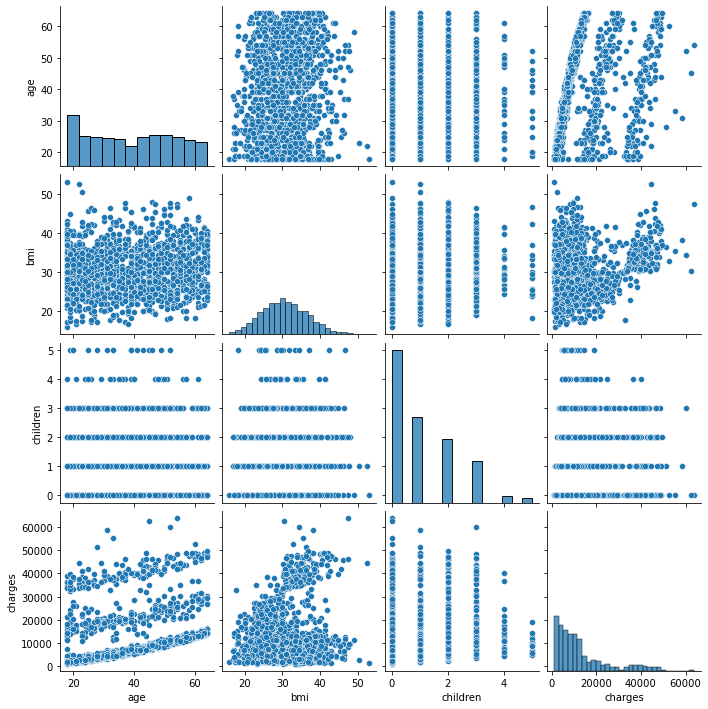

In [91]:
sns.pairplot(df_insurance)

<AxesSubplot:xlabel='age', ylabel='charges'>

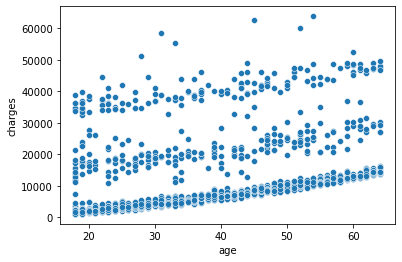

In [92]:
sns.scatterplot(y=df_insurance["charges"],x=df_insurance["age"] )

### Cleaning and Refining the Data
Now that we have observed that the bulk of charges covered fall in the range mentioned above. Let us also convert the categorical data of smoking into numerical data.

- It is a well known fact that one is prone to severe illnesses as a consequence of smoking.
- We shall map a yes under the smoking column to 1 while a no to 0.

In [105]:
def smokermapping(input):
    if input == "yes":
        return 1
    else:
        return 0

In [106]:
df_insurance_cleaned = df_insurance.copy()
rowselector = (df_insurance["charges"]<=17500)
df_insurance_cleaned = df_insurance_cleaned.loc[rowselector, :]
df_insurance_cleaned["smoker"] = df_insurance["smoker"].apply(smokermapping)
df_insurance_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,1,southwest,16884.9240
1,18,male,33.77,1,0,southeast,1725.5523
2,28,male,33.00,3,0,southeast,4449.4620
4,32,male,28.88,0,0,northwest,3866.8552
5,31,female,25.74,0,0,southeast,3756.6216
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,0,southwest,11411.6850
1333,50,male,30.97,3,0,northwest,10600.5483
1334,18,female,31.92,0,0,northeast,2205.9808
1335,18,female,36.85,0,0,southeast,1629.8335


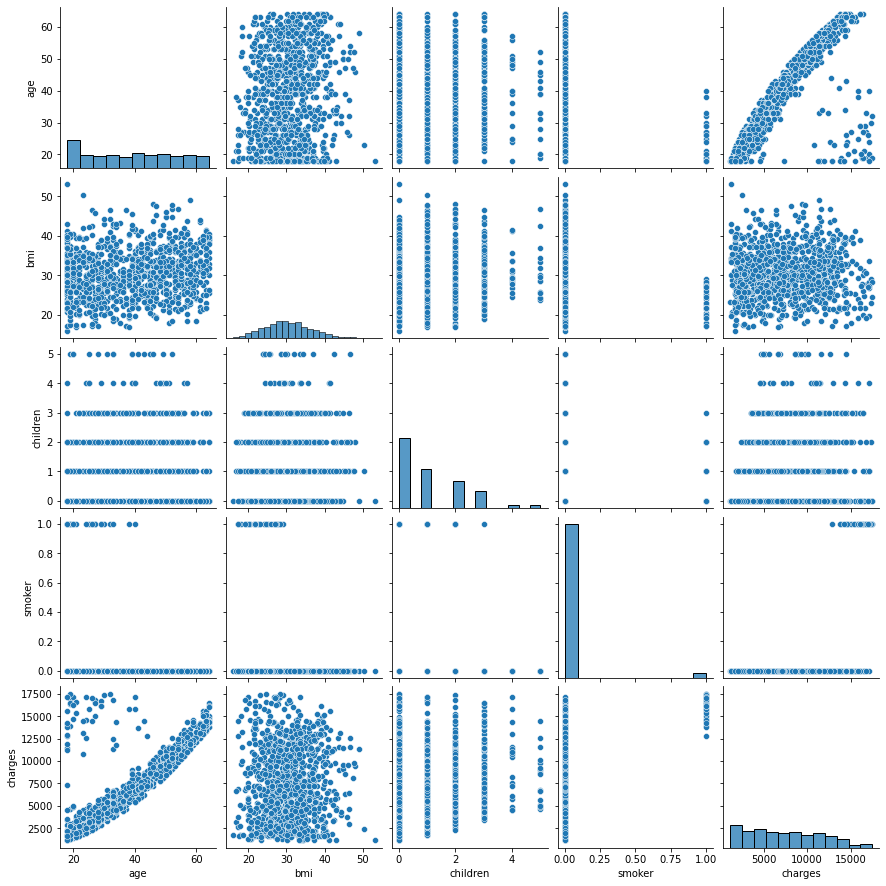

In [107]:
sns.pairplot(df_insurance_cleaned)

### Uncovering Relationships
- It is a known fact that our susceptibility to diseases increases as we put on age, hence a higher charges are claimed in people of older ages. This is an evident relation that is being seen in the pairplot above. We can see that the age is almost quadratically related to the charges that are claimed, except for a few outliers.

In [108]:
df_insurance_cleaned["age^2"] = df_insurance_cleaned["age"].apply(lambda item: item**2)
df_insurance_cleaned

,age,sex,bmi,children,smoker,region,charges,age^2
0,19,female,27.90,0,1,southwest,16884.9240,361
1,18,male,33.77,1,0,southeast,1725.5523,324
2,28,male,33.00,3,0,southeast,4449.4620,784
4,32,male,28.88,0,0,northwest,3866.8552,1024
5,31,female,25.74,0,0,southeast,3756.6216,961
...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,0,southwest,11411.6850,2704
1333,50,male,30.97,3,0,northwest,10600.5483,2500
1334,18,female,31.92,0,0,northeast,2205.9808,324
1335,18,female,36.85,0,0,southeast,1629.8335,324


### Feature and Target Selection
- With all the observations made and inferences made, we have our features as ["age^2", "bmi", "children", "smoker"] and the target as ["charges"].
- Let us initialise the process with all the starter code needed for doing the Multiple Linear Regression.

In [109]:
def normalize_z(df):
    dfout = (df - df.mean(axis=0))/df.std(axis=0)
    return dfout
    pass

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    feature = df_feature.to_numpy()
    ones = np.ones((df_feature.shape[0],1))
    X = np.concatenate((ones, feature), axis=1)
    return X
    pass

def prepare_target(df_target):
    return df_target.to_numpy()
    pass

def predict(df_feature, beta):
    dfout = normalize_z(df_feature)
    X = prepare_feature(dfout)
    return predict_norm(X, beta)
    pass

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y
    pass

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ymean = np.mean(y)
    sstot = np.sum((y-ymean)**2)
    ssres = np.sum((y-ypred)**2)

    r_2 = 1 - (ssres/sstot)
    return r_2
    pass

def mean_squared_error(target, pred):
    n = target.shape[0]
    return (1/n)*np.sum((target-pred)**2)
    pass

In [110]:
df_insurance_feature, df_insurance_target = get_features_targets(df_insurance_cleaned, ["age^2", "bmi", "children", "smoker"], ["charges"])
df_insurance_features = normalize_z(df_insurance_feature)
df_insurance_features_train, df_insurance_features_test, df_insurance_target_train, df_insurance_target_test = split_data(df_insurance_features, df_insurance_target, random_state=100, test_size=0.5)

In [111]:
def compute_cost(X, y, Beta):
    J = 0
    m = X.shape[0]
    ypred = np.matmul(X, Beta)
    error = y - ypred
    error_sq = np.matmul(error.T, error)
    J = (1/2*m)*error_sq
    return J[0][0]

In [112]:
X = prepare_feature(df_insurance_features_train)
target = prepare_target(df_insurance_target_train)
beta = np.zeros((5,1))
J = compute_cost(X, target, beta)
print(J)

9832335809177.787


In [113]:
def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        driv = np.matmul(X.T, ((np.matmul(X,beta))-y))
        beta = beta - ((1/m))*alpha*driv
        J_storage[n] = compute_cost(X, y, beta)
    return beta, J_storage
    

[[7487.45546458]
 [3570.68202163]
 [  28.12451497]
 [ 654.79770712]
 [2231.34313592]]


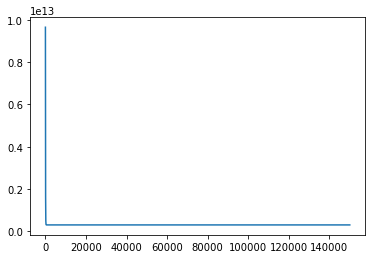

In [114]:
beta, J_storage = gradient_descent(X, target, beta, 0.01, 150000)
print(beta)
plt.plot(J_storage)

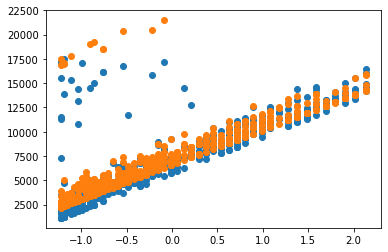

In [115]:
pred = predict(df_insurance_features_test, beta)
target = df_insurance_target_test.to_numpy()
plt.scatter(df_insurance_features_test["age^2"], target)
plt.scatter(df_insurance_features_test["age^2"], pred)

In [116]:
r2score = r2_score(target, pred)
print(r2score)

0.8907398725062781
